In [1]:
import dexpy.optimal
from dexpy.model import make_model, ModelOrder
from dexpy.design import coded_to_actual
from patsy import dmatrix
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.space import Integer, Categorical, Real, Space
import numpy as np

In [3]:
print(ProcessOptimizer.__version__)

1.0.0_RUCT


# These cells are all the very early experimentation

In [3]:
space_design = Space(dimensions=[Integer(10, 40, name='ul indicator'),
         Integer(20, 100, name='ul base'),
         Integer(20, 100, name='ul acid'),
         Integer(0, 50, name='ul water1'),
         Integer(0, 10, name='ul water2'),
         Categorical(["boric and citric", "citric only"])])

In [4]:
dmatrix('a + b + a:b', data={'a': [1, 2, 3], 'b': [4, 5, 6]}, return_type='matrix')

DesignMatrix with shape (3, 4)
  Intercept  a  b  a:b
          1  1  4    4
          1  2  5   10
          1  3  6   18
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'b' (column 2)
    'a:b' (column 3)

In [134]:
ab = np.array([[1, 2, 3], [4, 5, 6]])
print(ab[0])
print(ab[1])
dmatrix('a + b + a:b', data={'a': ab[0], 'b': ab[1]}, return_type='matrix')

[1 2 3]
[4 5 6]


DesignMatrix with shape (3, 4)
  Intercept  a  b  a:b
          1  1  4    4
          1  2  5   10
          1  3  6   18
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'b' (column 2)
    'a:b' (column 3)

In [ ]:
dmatrix('a + b + a:b', data={}, return_type='dataframe')

In [43]:
reaction_design = dexpy.optimal.build_optimal(3, run_count=9, model='X1 + X2 + X1:X2 + X3 + X1:X3 + X2:X3 + X1:X2:X3 + X1**3', randomize=False)

c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

In [44]:
print(reaction_design)
print(type(reaction_design))

    X1   X2   X3
0  1.0 -1.0  1.0
1  1.0 -1.0 -1.0
2  1.0  1.0  1.0
3  1.0  1.0 -1.0
4 -1.0 -1.0  1.0
5 -1.0  1.0  1.0
6 -1.0 -1.0 -1.0
7 -1.0  1.0 -1.0
8  1.0 -1.0  1.0
<class 'pandas.core.frame.DataFrame'>


c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

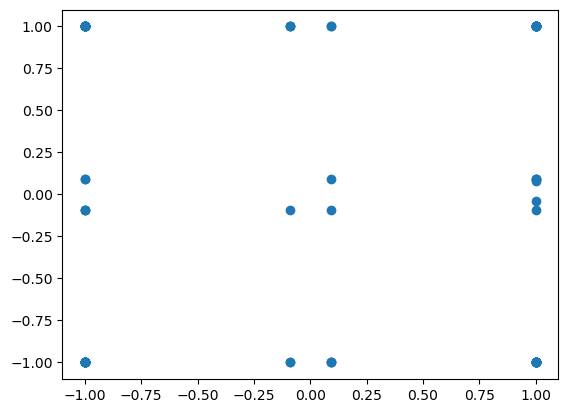

In [103]:
import matplotlib.pyplot as plt

for n in range(1):
    reaction_design = dexpy.optimal.build_optimal(5, run_count=88, order=ModelOrder.quadratic, randomize=False)
    #print(reaction_design)
    
    column_names = ['time', 'temp', 'geg', 'gege', 'gegegeq']
    reaction_design.columns = column_names   # This is some pandas stuff

    plt.scatter(reaction_design['time'], reaction_design['temp'])

plt.show()

In [74]:
import dexpy.optimal
from dexpy.model import ModelOrder

column_names = ['time', 'temp']
actual_lows = { 'time': 40, 'temp': 80 }
actual_highs = { 'time': 50, 'temp': 90 }
reaction_design.columns = column_names
print(coded_to_actual(reaction_design, actual_lows, actual_highs))

        time       temp
0  50.000000  80.000000
1  50.000000  90.000000
2  50.000000  84.545455
3  40.000000  80.000000
4  44.545455  80.000000
5  40.000000  90.000000
6  40.000000  84.545455
7  45.454545  85.454545
8  44.545455  90.000000


c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

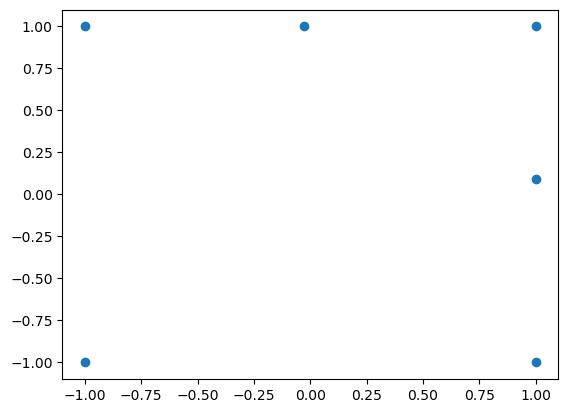

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

reaction_design = dexpy.optimal.build_optimal(2, order=ModelOrder.quadratic)
column_names = ['time', 'temp']
reaction_design.columns = column_names

plt.scatter(reaction_design['time'], reaction_design['temp'])


#fg = sns.lmplot(data=reaction_design, fit_reg=False)
#ax = fg.axes[0, 0]
#ax.set_xticks([-1, 0, 1])
#ax.set_xticklabels(['40 min', '45 min', '50 min'])
#ax.set_yticks([-1, 0, 1])
#ax.set_yticklabels(['80C', '85C', '90C'])
plt.show()

# TONS OF TEST CODE BELOW

In [13]:
from patsy import dmatrix, ModelDesc

import math

from dexpy.model import make_model, ModelOrder  # See if I can get these removed in the end

## copy/paste some functions from dexpy

Some basic functions

In [106]:
def hit_and_run(x0, constraint_matrix, bounds, n_samples, thin = 1):
    """A basic implementation of the hit and run sampler

    :param x0: The starting value of sampler.
    :param constraint_matrix: A matrix of constraints in the form Ax <= b.
    :param bounds: A vector of bounds in the form Ax <= b.
    :param n_samples: The numbers of samples to return.
    :param thin: The thinning factor. Retain every 'thin' sample (e.g. if thin = 2, retain every 2nd sample)

    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    x = np.copy(x0)
    p = len(x)

    out_samples = np.zeros((n_samples, p))

    for i in range(0, n_samples):
        thin_count = 0

        while thin_count < thin:
            thin_count = thin_count + 1

            random_dir = np.random.normal(0.0, 1.0, p)
            random_dir = random_dir / np.linalg.norm(random_dir)

            denom = constraint_matrix.dot(random_dir)
            intersections = (bounds - constraint_matrix.dot(x)) / denom
            t_low  = np.max(intersections[denom < 0])
            t_high  = np.min(intersections[denom > 0])

            u = np.random.uniform(0, 1)
            random_distance = t_low + u * (t_high - t_low)
            x_new = x + random_distance * random_dir

        out_samples[i, ] = x_new
        x = x_new

    return(out_samples)

In [142]:
def bootstrap(factor_names, model, run_count):
    """Create a minimal starting design that is non-singular."""
    md = ModelDesc.from_formula(model)    # Potentially remove this dependency - Not as important as we look to still be using dmatrix from patsy
    model_size = len(md.rhs_termlist)
    if run_count == 0:
        run_count = model_size
    if model_size > run_count:
        raise ValueError("Can't build a design of size {} "
                         "for a model of rank {}. "
                         "Model: '{}'".format(run_count, model_size, model))

    factor_count = len(factor_names)
    x0 = np.zeros(factor_count)
    # add high/low bounds to constraint matrix
    constraint_matrix = np.zeros((factor_count * 2, factor_count))
    bounds = np.zeros(factor_count * 2)
    c = 0
    for f in range(factor_count):
        constraint_matrix[c][f] = -1
        bounds[c] = 1
        c += 1
        constraint_matrix[c][f] = 1
        bounds[c] = 1
        c += 1

    start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)
    print(start_points)
    print(type(start_points))

    d = pd.DataFrame(start_points, columns=factor_names)   # I need to remove this dependency - Change function to something that doesn't require pandas but still works
    #d = np.array
    #print(d)  # This is something that I need to remove - Just for testing purposes
    X = dmatrix(model, d)
    #print(X)  # This is something that I need to remove - Just for testing purposes

    return (d, X)

Now also in my own version

In [148]:
def own_bootstrap(factor_names, model, run_count):
    """Create a minimal starting design that is non-singular.
    
    
    This function is modified from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    md = ModelDesc.from_formula(model)    # Potentially remove this dependency - Not as important as we look to still be using dmatrix from patsy
    model_size = len(md.rhs_termlist)
    if run_count == 0:
        run_count = model_size
    if model_size > run_count:
        raise ValueError("Can't build a design of size {} "
                         "for a model of rank {}. "
                         "Model: '{}'".format(run_count, model_size, model))

    factor_count = len(factor_names)
    x0 = np.zeros(factor_count)
    # add high/low bounds to constraint matrix
    constraint_matrix = np.zeros((factor_count * 2, factor_count))
    bounds = np.zeros(factor_count * 2)
    c = 0
    for f in range(factor_count):
        constraint_matrix[c][f] = -1
        bounds[c] = 1
        c += 1
        constraint_matrix[c][f] = 1
        bounds[c] = 1
        c += 1

    start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)
    #print(start_points)
    #print(factor_names)

    d = start_points

    d_dict = {}
    for i in range(0, factor_count):
        d_dict[factor_names[i]] = start_points[:,i]

    X = dmatrix(model, d_dict, return_type='matrix')

    return (d, X)

In [90]:
#bootstrap(factor_names, model, run_count)

#How does d and X change when I change away from pandas


# NEED TO FIND EXAMPLE FACTOR NAMES AND MODEL TO TEST THIS FUNCTION



In [91]:
dmatrix('a + b + a:b', data={'a': [1, 2, 3], 'b': [4, 5, 6]}, return_type='matrix')

DesignMatrix with shape (3, 4)
  Intercept  a  b  a:b
          1  1  4    4
          1  2  5   10
          1  3  6   18
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'b' (column 2)
    'a:b' (column 3)

Below are utility functions that do not use anything but np. I probably do not need to change anything here but time will tell

In [92]:
def update(XtXi, new_point, old_point):
    """rank-2 update of the variance-covariance matrix

    Equation (6) from Meyer and Nachtsheim :cite:`MeyerNachtsheim1995`.
    """
    F2 = np.vstack((new_point, old_point))
    F1 = F2.T.copy()
    F1[:,1] *= -1
    FD = np.dot(F2, XtXi)
    I2x2 = np.identity(2) + np.dot(FD, F1)
    Inverse2x2 = np.linalg.inv(I2x2)
    F2x2FD = np.dot(np.dot(F1, Inverse2x2), FD)
    return XtXi - np.dot(XtXi, F2x2FD)

def expand_point(design_point, code):
    """Converts a point in factor space to conform with the X matrix."""
    return np.array(eval(code, {}, design_point))

def delta(X, XtXi, row, new_point):
    """Calculates the change in D-optimality from exchanging a point.

    This is equation (1) in Meyer and Nachtsheim :cite:`MeyerNachtsheim1995`.
    """
    old_point = X[row]

    added_variance = np.dot(new_point, np.dot(XtXi, new_point.T))
    removed_variance = np.dot(old_point, np.dot(XtXi, old_point.T))
    covariance = np.dot(new_point, np.dot(XtXi, old_point.T))
    return (
        1 + (added_variance - removed_variance) +
            (covariance * covariance - added_variance * removed_variance)
    )


This is the main function. It is important that it works. Result does not nessesarily have to be the same as in dexpy.
Maybe I can avoid using dexpy.design.get_factor_names(factor_count). It simply gives X1, X2 etc. 
I might be able to just pipe in the names from the defined space group.


In [127]:
def build_optimal_own(factor_count, **kwargs):
    r"""Builds an optimal design.

    This uses the Coordinate-Exchange algorithm from Meyer and Nachtsheim 1995
    :cite:`MeyerNachtsheim1995`.

    :param factor_count: The number of factors to build for.
    :type factor_count: integer

    :Keyword Arguments:
        * **order** (:class:`ModelOrder <dexpy.model.ModelOrder>`) -- \
            Builds a design for this order model. \
            Mutually exclusive with the **model** parameter.
        * **model** (`patsy formula <https://patsy.readthedocs.io>`_) -- \
            Builds a design for this model formula. \
            Mutually exclusive with the **order** parameter.
        * **run_count** (`integer`) -- \
            The number of runs to use in the design. This must be equal\
            to or greater than the rank of the model.
    """
    factor_names = dexpy.design.get_factor_names(factor_count)  # See if this can be replaced with something the uses po.Space instead
    #factor_names = ['X1', 'X2']

    model = kwargs.get('model', None)
    if model is None:
        order = kwargs.get('order', ModelOrder.quadratic)
        model = make_model(factor_names, order, True)

    run_count = kwargs.get('run_count', 0)

    print(factor_names, model, run_count)

    # first generate a valid starting design
    (design, X) = own_bootstrap(factor_names, model, run_count)
    #(design, X) = bootstrap(factor_names, model, run_count)

    print(design)


    # This seems like a lot of work to make the full_func string
    functions = []
    for _, subterms in X.design_info.term_codings.items():
        sub_funcs = []
        for subterm in subterms:
            for factor in subterm.factors:
                eval_code = X.design_info.factor_infos[factor].state['eval_code']
                if eval_code[0] == 'I':
                    eval_code = eval_code[1:]
                sub_funcs.append(eval_code)
        if not sub_funcs:
            functions.append("1") # intercept
        else:
            functions.append("*".join(sub_funcs))

    full_func = "[" + ",".join(functions) + "]"
    code = compile(full_func, "<string>", "eval")



    steps = 12
    low = -1
    high = 1

# DO I REALLY NEED A palsy dmatrix X?


    XtXi = np.linalg.inv(np.dot(np.transpose(X), X))
    (_, d_optimality) = np.linalg.slogdet(XtXi)

    design_improved = True
    swaps = 0
    evals = 0
    min_change = 1.0 + np.finfo(float).eps
    while design_improved:

        design_improved = False
        #print(design)
        for i in range(0, len(design)):

            # I NEED TO MAKE THE DICT INTO SOMETHING ELSE SUCH AS NUMPY ARRAY OR FIGURE OUT HOW TO DO THE LINE BELOW WITH A DICT
            # I do not want to use a DICT. I want to use a numpy array
            # I need to test d_matrix taking a numpy array instead of a dict

            #design_point = design.iloc[i]   # This is some pandas stuff that I need to remove
            print("this is the design point")
            print(design.keys()[0])
            design_point = design.keys()[i]

            

            for f in range(0, factor_count):

                original_value = design_point[f]
                original_expanded = X[i]
                best_step = -1
                best_point = []
                best_change = min_change

                for s in range(0, steps):

                    design_point[f] = low + ((high - low) / (steps - 1)) * s
                    new_point = expand_point(design_point, code)
                    change_in_d = delta(X, XtXi, i, new_point)
                    evals += 1

                    if change_in_d - best_change > np.finfo(float).eps:
                        best_point = new_point
                        best_step = s
                        best_change = change_in_d

                if best_step >= 0:

                    # update X with the best point
                    design_point[f] = low + ((high - low) / (steps - 1)) * best_step
                    XtXi = update(XtXi, best_point, X[i])
                    X[i] = best_point

                    d_optimality -= math.log(best_change)
                    design_improved = True
                    swaps += 1

                else:

                    # restore the original design point value
                    design_point[f] = original_value
                    X[i] = original_expanded

    #logging.info("{} swaps evaluated, {} executed ({:.2f}%)".format(evals, swaps, 100*(swaps / evals)))  # Maybe reconsider this. Outcomment for now

    return design

# WRITE SOME TESTS TO SEE IF THE THINGS I MESS WITH WORK: THEY ARE BELOW HERE

In [128]:
# Example 1
#import pandas as pd

reaction_design = build_optimal_own(2, run_count=4, model='X1 + X2 + X1:X2')
#print(reaction_design)
#print(type(reaction_design))

['X1', 'X2'] X1 + X2 + X1:X2 4
{'X1': array([ 0.35562103,  0.90588376, -0.10788743,  0.67303516]), 'X2': array([-0.11645201, -0.34850116, -0.46293467,  0.70110242])}
this is the design point


TypeError: 'dict_keys' object is not subscriptable

In [143]:
b = bootstrap(['X1', 'X2'], 'X1 + X2 + X1:X2', 4)




[[-1.50699516e-01 -1.93909790e-01]
 [ 2.26702110e-01 -8.83458591e-02]
 [ 1.74713520e-04 -5.25353716e-01]
 [-1.02848780e-01 -7.30391022e-01]]
<class 'numpy.ndarray'>


In [150]:
b = own_bootstrap(['X1', 'X2'], 'X1 + X2 + X1:X2', 4)

print(b)

print(type(b))
print(type(b[0]))
print(type(b[1]))

(array([[ 0.15172183, -0.78044796],
       [ 0.16325276, -0.78505534],
       [-0.11131114, -0.93080188],
       [-0.34114155,  0.04662948]]), DesignMatrix with shape (4, 4)
  Intercept        X1        X2     X1:X2
          1   0.15172  -0.78045  -0.11841
          1   0.16325  -0.78506  -0.12816
          1  -0.11131  -0.93080   0.10361
          1  -0.34114   0.04663  -0.01591
  Terms:
    'Intercept' (column 0)
    'X1' (column 1)
    'X2' (column 2)
    'X1:X2' (column 3))
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'patsy.design_info.DesignMatrix'>


In [105]:
factor_names = ['X1', 'X2']
run_count = 4
model = 'X1 + X2 + X1:X2 + pow(X1,2)'

factor_count = len(factor_names)
x0 = np.zeros(factor_count)
# add high/low bounds to constraint matrix
constraint_matrix = np.zeros((factor_count * 2, factor_count))
bounds = np.zeros(factor_count * 2)
c = 0
for f in range(factor_count):
    constraint_matrix[c][f] = -1
    bounds[c] = 1
    c += 1
    constraint_matrix[c][f] = 1
    bounds[c] = 1
    c += 1

start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)

print(start_points)
print(type(start_points))

# Alternative dmatrix_maker

#print(start_points[:,0])
d = {}
for i in range(0, factor_count):
    d[factor_names[i]] = start_points[:,i]

#d = {factor_names[0]: start_points[:,0], factor_names[1]: start_points[:,1]}  # This needs to be generalized to work with any number of factors
#print(d)
X = dmatrix(model, d)

# dmatrix is nice but I could get around it. I would need to write a small function or make the formular input a bit more tricky

print(X)
dmatrix(model, d)
#print(X)

[[-0.08270149  0.05239263]
 [ 0.12613884 -0.84141597]
 [ 0.21338828  0.99737545]
 [ 0.67637472  0.97885651]]
<class 'numpy.ndarray'>
[[ 1.         -0.08270149  0.05239263 -0.00433295  0.00683954]
 [ 1.          0.12613884 -0.84141597 -0.10613523  0.01591101]
 [ 1.          0.21338828  0.99737545  0.21282824  0.04553456]
 [ 1.          0.67637472  0.97885651  0.6620738   0.45748276]]


DesignMatrix with shape (4, 5)
  Intercept        X1        X2     X1:X2  pow(X1, 2)
          1  -0.08270   0.05239  -0.00433     0.00684
          1   0.12614  -0.84142  -0.10614     0.01591
          1   0.21339   0.99738   0.21283     0.04553
          1   0.67637   0.97886   0.66207     0.45748
  Terms:
    'Intercept' (column 0)
    'X1' (column 1)
    'X2' (column 2)
    'X1:X2' (column 3)
    'pow(X1, 2)' (column 4)

In [97]:
X.design_info.term_codings.items()

odict_items([(Term([]), [SubtermInfo(factors=(), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X1')]), [SubtermInfo(factors=(EvalFactor('X1'),), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X2')]), [SubtermInfo(factors=(EvalFactor('X2'),), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X1'), EvalFactor('X2')]), [SubtermInfo(factors=(EvalFactor('X1'), EvalFactor('X2')),
            contrast_matrices={},
            num_columns=1)]), (Term([EvalFactor('pow(X1, 2)')]), [SubtermInfo(factors=(EvalFactor('pow(X1, 2)'),),
            contrast_matrices={},
            num_columns=1)])])

# Full example - Helper functions above

In [98]:
from ProcessOptimizer.space import Integer, Categorical, Real, Space
import numpy as np

space_design = Space(dimensions=[Real(10, 40, name='ul indicator'),
            Real(20, 100, name='ul base'),
            Real(20, 100, name='ul acid'),
            Real(0, 50, name='ul water1'),
            Real(0, 10, name='ul water2'),])
                                 